<a href="https://colab.research.google.com/github/Bubbit/week3-supervised-learning/blob/master/Classification_example1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Download lesson datasets
# Required if you're using Google Colab
!wget "https://github.com/ML-Challenge/week3-supervised-learning/raw/master/datasets.zip"
!unzip -o datasets.zip

# Import dependencies
import utils
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
# and setting the size of all plots.
plt.rcParams['figure.figsize'] = [11, 7]

--2020-02-23 09:00:05--  https://github.com/ML-Challenge/week3-supervised-learning/raw/master/datasets.zip
Resolving github.com (github.com)... 140.82.113.3
Connecting to github.com (github.com)|140.82.113.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/ML-Challenge/week3-supervised-learning/master/datasets.zip [following]
--2020-02-23 09:00:06--  https://raw.githubusercontent.com/ML-Challenge/week3-supervised-learning/master/datasets.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 132103 (129K) [application/zip]
Saving to: ‘datasets.zip’

datasets.zip        100%[===================>] 129.01K  --.-KB/s    in 0.04s   

2020-02-23 09:00:07 (3.45 MB/s) - ‘datasets.zip’ saved [132103/132103]

Arc

In [45]:
from sklearn.datasets import load_wine

## Load dataset and look at default data
wine_data = load_wine()
print(wine_data.keys())
print(wine_data.DESCR)

print(wine_data.data.shape)

pd_wine = pd.DataFrame(data= np.c_[wine_data['data'], wine_data['target']],
                     columns= wine_data['feature_names'] + ['target'])

print(pd_wine.head())
print(pd_wine.tail())

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])
.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178 (50 in each of three classes)
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:              

In [41]:
# Split into train/test

# Import necessary modules
from sklearn.model_selection import train_test_split
# Import KNeighborsClassifier from sklearn.neighbors
from sklearn.neighbors import KNeighborsClassifier

# Create feature and target arrays
data = wine_data.data
print(data)
labels = wine_data.target

data_train, data_test, labels_train, labels_test = train_test_split(data, labels, test_size = 0.2, random_state=42, stratify=labels)

[[1.423e+01 1.710e+00 2.430e+00 ... 1.040e+00 3.920e+00 1.065e+03]
 [1.320e+01 1.780e+00 2.140e+00 ... 1.050e+00 3.400e+00 1.050e+03]
 [1.316e+01 2.360e+00 2.670e+00 ... 1.030e+00 3.170e+00 1.185e+03]
 ...
 [1.327e+01 4.280e+00 2.260e+00 ... 5.900e-01 1.560e+00 8.350e+02]
 [1.317e+01 2.590e+00 2.370e+00 ... 6.000e-01 1.620e+00 8.400e+02]
 [1.413e+01 4.100e+00 2.740e+00 ... 6.100e-01 1.600e+00 5.600e+02]]


In [0]:
# Setup arrays to store train and test accuracies
neighbors = np.arange(1, 9)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

In [0]:
# Loop over different values of k
for i, k in enumerate(neighbors):
    # Setup a k-NN Classifier with k neighbors: knn
    knn = KNeighborsClassifier(n_neighbors=k)

    # Fit the classifier to the training data
    knn.fit(data_train, labels_train)
    
    # Compute accuracy on the training set
    train_accuracy[i] = knn.score(data_train, labels_train)

    # Compute accuracy on the testing set
    test_accuracy[i] = knn.score(data_test, labels_test)

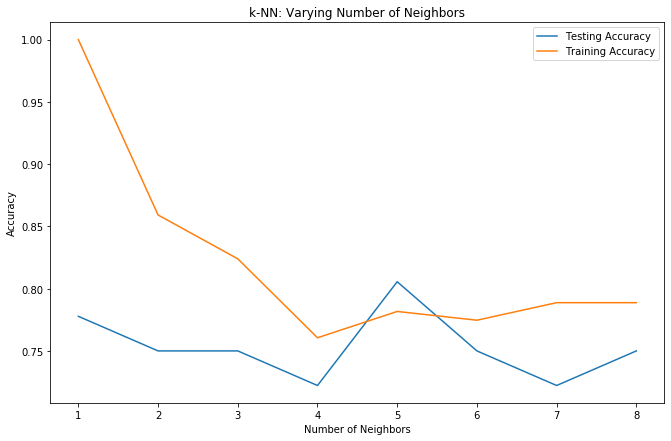

In [19]:
# Generate plot
plt.title('k-NN: Varying Number of Neighbors')
plt.plot(neighbors, test_accuracy, label = 'Testing Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()

In [34]:
# Use Decision Tree

from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(max_depth=6, random_state=utils.SEED)

dt.fit(data_train, labels_train)

dt_pred = dt.predict(data_test)
print(dt_pred)

[0 1 0 1 1 0 0 1 1 2 1 2 0 2 0 1 1 0 1 1 1 1 0 0 1 1 0 2 1 2 0 2 1 2 2 2]


In [39]:
# Use Logistic Regression

from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(solver='liblinear', random_state=utils.SEED)

logreg.fit(data_train, labels_train)
logreg_pred = logreg.predict(data_test)
print(logreg_pred)

[0 2 0 1 1 0 0 1 1 2 1 2 0 1 0 1 1 0 1 0 1 1 0 0 1 1 0 2 1 2 0 2 1 2 2 2]


In [40]:
# Evaluate the approaches

from sklearn.metrics import accuracy_score

# Compute test set accuracy for Decision tree
dt_acc = accuracy_score(labels_test, dt_pred)
print(f"Test set accuracy for dt: {dt_acc:.2f}")

# Compute test set accuracy for Logisctic Regression
logreg_acc = accuracy_score(labels_test, logreg_pred)
print(f"Test set accuracy for LR: {logreg_acc:.2f}")

print(f"Test set accuracy for knn: {max(test_accuracy):.2f}")

Test set accuracy for dt: 0.94
Test set accuracy for LR: 0.97
Test set accuracy for knn: 0.81
